In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import (
    plot_decision_boundary,
    sigmoid,
    load_planar_dataset,
    load_extra_datasets,
)

%matplotlib inline

In [2]:
X, Y = load_planar_dataset()

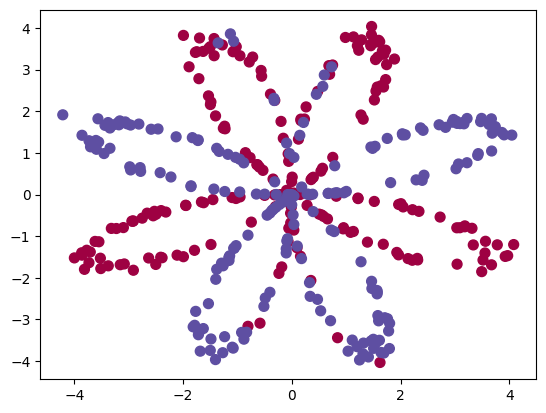

In [ ]:
plt.scatter(X[0, :], X[1, :], c=Y, s=50, cmap=plt.cm.Spectral);

In [8]:
shape_X=X.shape
shape_Y=Y.shape
m=shape_X[1]
print("The shape of x is: "+ str(shape_X))
print("The shape of y is: "+ str(shape_Y))
print("Number of training examples: "+ str(m))

The shape of x is: (2, 400)
The shape of y is: (1, 400)
Number of training examples: 400


# Simple LR

In [10]:
clf= sklearn.linear_model.LogisticRegressionCV()
y_reshaped=Y.ravel()
clf.fit(X.T,y_reshaped);

Accuracy of logistic regression: 47% percentage of correctly labelled datapoints


C:\Users\divya\AppData\Local\Temp\ipykernel_17936\2960933069.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  % float(


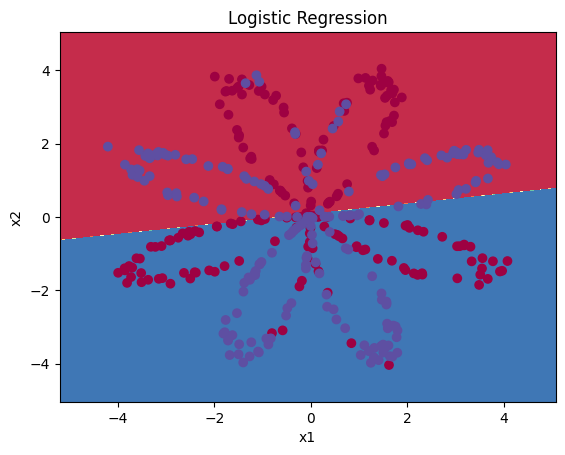

In [13]:
plot_decision_boundary(lambda x: clf.predict(x),X,Y)
plt.title("Logistic Regression")

LR_predictions=clf.predict(X.T)
print(
    "Accuracy of logistic regression: %d"
    % float(
    (np.dot(Y,LR_predictions)+np.dot(1-Y,1-LR_predictions))
    /float(Y.size)*100
    )
    + "% "
    + "percentage of correctly labelled datapoints"
)

# Neural Network Model

In [14]:
#layer_sizes
def layer_sizes(X,Y):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    return(n_x,n_h,n_y)

In [15]:
X_assess,Y_assess=layer_sizes_test_case()
(n_x,n_h,n_y)=layer_sizes(X_assess,Y_assess)
print("The size of the input layer is: n_x= "+str(n_x))
print("The size of the hidden layer is: n_h= "+str(n_h))
print("The size of the output layer is: n_y= "+str(n_y))

The size of the input layer is: n_x= 5
The size of the hidden layer is: n_h= 4
The size of the output layer is: n_y= 2


## Initialize model's parameters

In [16]:
#initialize_parameters
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    scale_factor=0.01
    w1=np.random.randn(n_h,n_x)*scale_factor
    b1=np.zeros((n_h,1))
    w2=np.random.randn(n_y,n_h)* scale_factor
    b2=np.zeros((n_y,1))

    assert w1.shape==(n_h,n_x)
    assert b1.shape==(n_h,1)
    assert w2.shape==(n_y,n_h)
    assert b2.shape==(n_y,1)

    parameters={"w1":w1,"b1":b1,"w2":w2,"b2":b2}
    return parameters

In [17]:
n_x,n_h,n_y=initialize_parameters_test_case()
parameters=initialize_parameters(n_x,n_h,n_y)
print("w1= "+str(parameters["w1"]))
print("b1= "+str(parameters["b1"]))
print("w2= "+str(parameters["w2"]))
print("b2= "+str(parameters["b2"]))

w1= [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1= [[0.]
 [0.]
 [0.]
 [0.]]
w2= [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2= [[0.]]


In [18]:
def forward_propagation(X, parameters):
    w1=parameters.get("w1")
    b1=parameters.get("b1")
    w2=parameters.get("w2")
    b2=parameters.get("b2")


    z1=np.dot(w1,X)+b1
    a1=np.tanh(z1)
    z2=np.dot(w2,a1)+b2
    a2=sigmoid(z2)

    assert a2.shape== (1, X.shape[1])
    cache={"z1":z1,"a1":a1,"z2":z2,"a2":a2}
    return a2,cache